# Aula 1 - Multilayer Perceptron

Perceptron de multicamadas (MLP) é uma classe de rede neural artificial feedforward. Um MLP consiste em pelo menos três camadas de nós: uma camada de entrada, uma camada oculta e uma camada de saída. Exceto para os nós de entrada, cada nó é um neurônio que usa uma função de ativação não linear. O MLP utiliza uma técnica de aprendizado supervisionado chamada backpropagation para treinamento. Sua múltiplas camadas e a capacidade de aprender não linearmente separáveis tornam-no uma ferramenta universal para aproximar funções.

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

In [46]:
df = pd.read_excel('../data/sementes_abobora.xlsx')
df.head(5)

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,(A) Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,(A) Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,(A) Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,(A) Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,(A) Çerçevelik


Como o dataframe está ordenado (classe A primeiro e depois classe B) é importante embaralhar os dados antes de treinar o modelo.

In [47]:
df = shuffle(df)
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
1601,85309,1265.954,550.4167,200.7066,86486,329.5737,0.9311,0.9864,0.7082,0.6689,2.7424,0.5988,(B) Ürgüp Sivrisi
1073,65832,985.634,382.8722,220.8535,66718,289.5167,0.8169,0.9867,0.7283,0.8516,1.7336,0.7562,(A) Çerçevelik
1597,81999,1205.900,521.2860,200.6103,82686,323.1166,0.9230,0.9917,0.5670,0.7086,2.5985,0.6198,(B) Ürgüp Sivrisi
340,62862,978.512,376.2576,213.0009,63538,282.9106,0.8243,0.9894,0.6808,0.8250,1.7665,0.7519,(A) Çerçevelik
350,87646,1175.700,469.6673,238.5995,88681,334.0574,0.8613,0.9883,0.6925,0.7968,1.9684,0.7113,(A) Çerçevelik


Vamos verificar se o dataframe está balanceado

In [48]:
df['Class'].value_counts()

Class
(A) Çerçevelik       1300
(B) Ürgüp Sivrisi    1200
Name: count, dtype: int64

## EDA

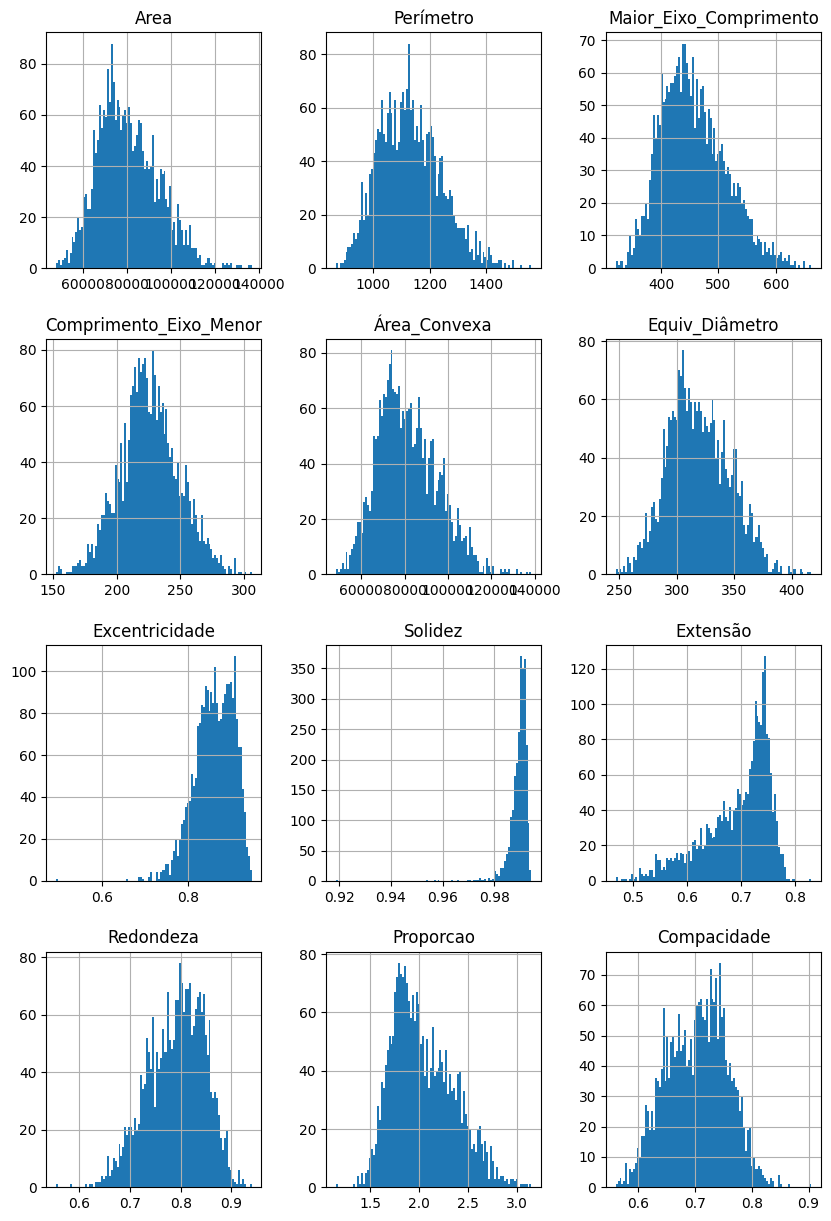

In [49]:
df.hist(bins=100, figsize=(10,15))
plt.show()

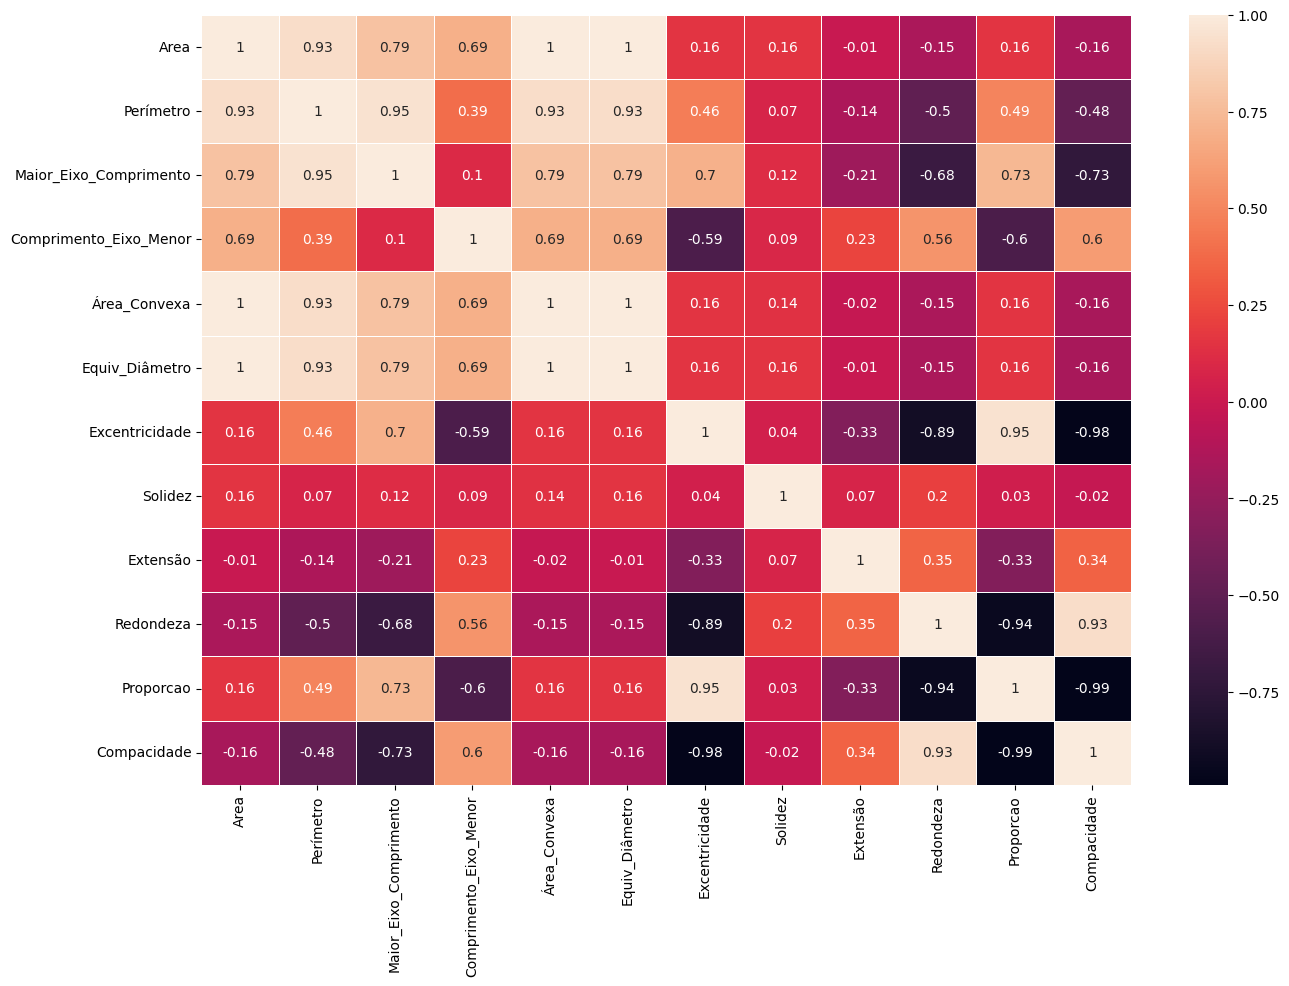

In [50]:
corr_matrix = df.drop('Class', axis=1).corr().round(2)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=corr_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

## Tratamento Variável Target

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [53]:
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
1601,85309,1265.954,550.4167,200.7066,86486,329.5737,0.9311,0.9864,0.7082,0.6689,2.7424,0.5988,1
1073,65832,985.634,382.8722,220.8535,66718,289.5167,0.8169,0.9867,0.7283,0.8516,1.7336,0.7562,0
1597,81999,1205.900,521.2860,200.6103,82686,323.1166,0.9230,0.9917,0.5670,0.7086,2.5985,0.6198,1
340,62862,978.512,376.2576,213.0009,63538,282.9106,0.8243,0.9894,0.6808,0.8250,1.7665,0.7519,0
350,87646,1175.700,469.6673,238.5995,88681,334.0574,0.8613,0.9883,0.6925,0.7968,1.9684,0.7113,0


## Separando Treino e Teste
Vamos separar os dados em treino e teste

In [54]:
from sklearn.model_selection import train_test_split

In [98]:
X = df[['Area','Perímetro', 'Comprimento_Eixo_Menor','Excentricidade','Solidez','Extensão','Redondeza', 'Proporcao', 'Compacidade']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Pré-Processamento
É importante normalizar os dados para que o modelo possa aprender de maneira mais eficiente. Vamos usar o StandardScaler para normalizar os dados.

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler_X = StandardScaler().fit(X_train)

X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = y_train.to_numpy().reshape(-1,1).astype('float32')
y_test = y_test.to_numpy().reshape(-1,1).astype('float32')

## Construindo a Rede Neural

In [101]:
import torch
import torch.nn as nn
import torch.optim as optim

In [102]:
# Semente fixa para reprodução dos resultados
torch.manual_seed(42)

# Definindo entradas e saídas da rede + batch_size
input_shape = X_train.shape[1]
output_shape = y_train.shape[1]
batch_size = 20

In [128]:
# Definindo a arquitetura da rede usando nn.Sequential
model = nn.Sequential(
    nn.Linear(input_shape, 20),
    nn.ReLU(),
    nn.Linear(20, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(6, output_shape),
    nn.Sigmoid()
)

# Definindo o otimizador Adam com uma learning rate específica
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Definindo a função de perda
loss = nn.BCELoss()

# Resumo do Modelo e Total de parâmetros treináveis e não treináveis
total_params = sum(p.numel() for p in model.parameters())
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(model)
print(f'Total parameters: {total_params}')
print(f'Total trainable parameters: {total_trainable_params}')

Sequential(
  (0): Linear(in_features=9, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=6, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2, inplace=False)
  (7): Linear(in_features=6, out_features=1, bias=True)
  (8): Sigmoid()
)
Total parameters: 537
Total trainable parameters: 537


In [129]:
def model_fit(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    loss_function,
    optimizer,
    epochs=50,
    batch_size=20
):

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)

    model.train()
    for epoch in range(epochs):
        print(f'Epoch {epoch+1}/{epochs}')
        running_loss_train = 0.0
        correct_predictions_train = 0
        for i in range(0, len(X_train), batch_size):

            inputs = X_train[i:i+batch_size]
            labels = y_train[i:i+batch_size]
            
            optimizer.zero_grad()
            
            outputs = model(inputs)

            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss_train += loss.item() * inputs.size(0)
            correct_predictions_train += (outputs.round() == labels).sum().item()

        epoch_loss_train = running_loss_train / len(X_train)
        epoch_acc_train = correct_predictions_train / len(X_train)
        train_loss.append(epoch_loss_train)
        train_acc.append(epoch_acc_train)
        print(f'Train Loss: {epoch_loss_train:.4f} - Train Accuracy: {epoch_acc_train:.4f}')

        model.eval()
        with torch.no_grad():
            running_loss_test = 0.0
            correct_predictions_test = 0
            for i in range(0, len(X_test), batch_size):

                inputs = X_test[i:i+batch_size]
                labels = y_test[i:i+batch_size]

                outputs = model(inputs)
                loss = loss_function(outputs, labels)

                running_loss_test += loss.item() * inputs.size(0)
                correct_predictions_test += (outputs.round() == labels).sum().item()

            epoch_loss_test = running_loss_test / len(X_test)
            epoch_acc_test = correct_predictions_test / len(X_test)
            test_loss.append(epoch_loss_test)
            test_acc.append(epoch_acc_test)
            print(f'Test Loss: {epoch_loss_test:.4f} - Test Accuracy: {epoch_acc_test:.4f}')

    return train_loss, train_acc, test_loss, test_acc

def calculate_accuracy(predictions, labels):
    predicted = (predictions > 0.5).float()
    correct = (predicted == labels).sum().item()
    accuracy = correct / labels.size(0)
    return accuracy

In [130]:
train_loss, train_acc, test_loss, test_acc = model_fit(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    loss,
    optimizer,
    epochs=50,
    batch_size=20
)

Epoch 1/50
Train Loss: 0.6398 - Train Accuracy: 0.5330
Test Loss: 0.5297 - Test Accuracy: 0.7840
Epoch 2/50
Train Loss: 0.4016 - Train Accuracy: 0.8625
Test Loss: 0.3424 - Test Accuracy: 0.8620
Epoch 3/50
Train Loss: 0.3135 - Train Accuracy: 0.8805
Test Loss: 0.3230 - Test Accuracy: 0.8700
Epoch 4/50
Train Loss: 0.3032 - Train Accuracy: 0.8825
Test Loss: 0.3140 - Test Accuracy: 0.8780
Epoch 5/50
Train Loss: 0.2977 - Train Accuracy: 0.8830
Test Loss: 0.3094 - Test Accuracy: 0.8780
Epoch 6/50
Train Loss: 0.2941 - Train Accuracy: 0.8825
Test Loss: 0.3062 - Test Accuracy: 0.8780
Epoch 7/50
Train Loss: 0.2913 - Train Accuracy: 0.8825
Test Loss: 0.3035 - Test Accuracy: 0.8780
Epoch 8/50
Train Loss: 0.2891 - Train Accuracy: 0.8830
Test Loss: 0.3010 - Test Accuracy: 0.8820
Epoch 9/50
Train Loss: 0.2872 - Train Accuracy: 0.8840
Test Loss: 0.2992 - Test Accuracy: 0.8840
Epoch 10/50
Train Loss: 0.2856 - Train Accuracy: 0.8845
Test Loss: 0.2974 - Test Accuracy: 0.8880
Epoch 11/50
Train Loss: 0.284

# Avaliando Modelo

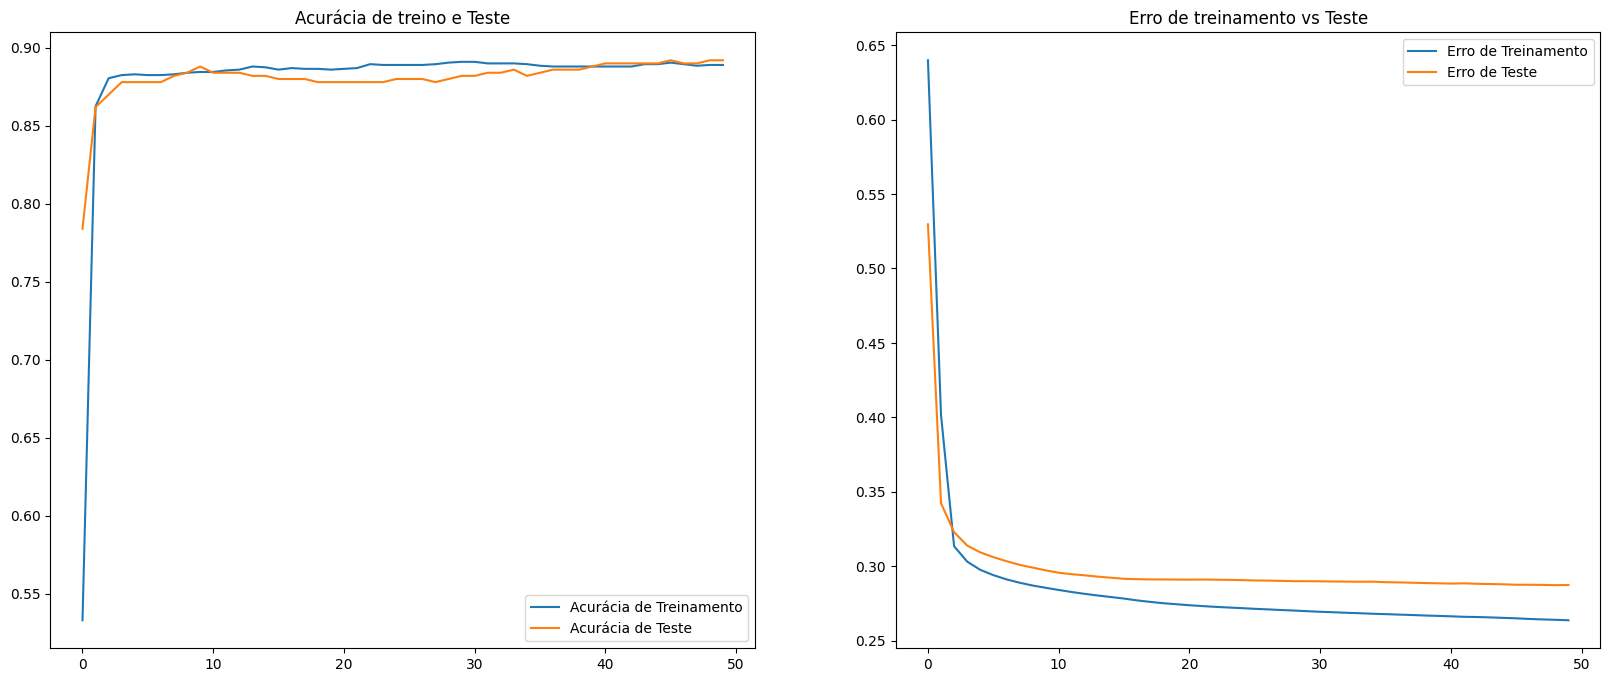

In [131]:
epochs_range = range(50)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, test_acc, label='Acurácia de Teste')
plt.legend(loc='lower right')
plt.title('Acurácia de treino e Teste')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Erro de Treinamento')
plt.plot(epochs_range, test_loss, label='Erro de Teste')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs Teste')
plt.show()

In [132]:
from sklearn.metrics import classification_report

model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_pred = model(X_test_tensor)
    y_pred = (y_pred > 0.5).float()

class_names = []
for i in y.unique():
    class_names.append(le.inverse_transform([int(i)])[0])


print(classification_report(y_test, y_pred.numpy(), target_names=class_names))

                   precision    recall  f1-score   support

(B) Ürgüp Sivrisi       0.87      0.93      0.90       261
  (A) Çerçevelik        0.92      0.85      0.88       239

         accuracy                           0.89       500
        macro avg       0.89      0.89      0.89       500
     weighted avg       0.89      0.89      0.89       500

